In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
import sklearn.linear_model as lm
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline

In [2]:
df = pd.read_csv("kc_house_data.csv", sep=",", header = 0)
df = df.drop(['id','date','zipcode'], axis=1)

In [3]:
print("# entries  = ", df.shape[0], "\n# features = ", df.shape[1], "\n")
df.info()
df.describe()

# entries  =  21613 
# features =  18 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(13)
memory usage: 3.0 MB


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
df[:10000:1000]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1000,700000.0,4,2.00,1830,4590,2.0,0,0,3,8,1830,0,1908,0,47.6593,-122.327,1650,4590
2000,470450.0,2,1.00,1010,3400,1.0,0,0,3,7,1010,0,1921,0,47.6711,-122.329,1800,3600
3000,307450.0,4,2.75,2690,8874,1.0,0,0,3,8,1370,1320,1980,0,47.3078,-122.383,1990,7875
4000,210000.0,2,1.75,1000,3554,1.0,0,0,4,8,1000,0,1975,0,47.3811,-122.320,1150,4000
5000,519000.0,5,2.25,2570,13054,1.0,0,1,3,8,1470,1100,1950,1992,47.4487,-122.352,2570,19807
6000,461000.0,2,1.00,1060,7193,1.0,0,0,3,7,1060,0,1926,0,47.7102,-122.356,1980,7560
7000,595000.0,4,2.00,3090,87120,1.0,0,0,4,7,1590,1500,1974,0,47.7275,-122.122,2560,88426
8000,355200.0,3,1.00,1120,7320,1.0,0,0,4,7,1120,0,1954,0,47.5103,-122.382,1410,6328
9000,1050000.0,3,3.00,3490,4500,2.5,0,0,3,9,3170,320,1924,0,47.6394,-122.321,2840,4050


In [5]:
y = np.log(df['price'])
X = df
X = X.drop('price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(15129, 17) (6484, 17) (15129,) (6484,)


In [6]:
scaler = StandardScaler().fit(X_train)
scaled_x_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
scaled_x_train.insert(scaled_x_train.shape[1], 'intercept', np.ones(scaled_x_train.shape[0]))

In [7]:
linreg = lm.LinearRegression(fit_intercept = False)
linreg.fit(scaled_x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [8]:
x = scaled_x_train.as_matrix()
n, m = x.shape # n = # of observations , m = # of features + 1 (intercept)
y_hat = linreg.predict(x)
MSE = np.sum((y_hat - y_train.values)**2)/(n - m)
std_err = np.sqrt(MSE * np.diag(np.linalg.pinv(np.dot(x.T,x)))) # s^2 = o^2*(X^T*X)^-1
z_scores = linreg.coef_/std_err # z = B/std_err
table = pd.DataFrame(np.column_stack((linreg.coef_, std_err, z_scores)), columns=['Coefficient', 'Std Error', 'Z-score'])
table

,Coefficient,Std Error,Z-score
0,-0.010009,0.002625,-3.812660
1,0.056077,0.003737,15.005227
2,0.067862,0.002390,28.389802
3,0.018535,0.002948,6.288226
4,0.038635,0.002922,13.220357
5,0.034299,0.002264,15.148633
6,0.042134,0.002446,17.222782
7,0.045411,0.002293,19.800932
8,0.183349,0.003793,48.339981
9,0.057188,0.002546,22.460761


In [9]:
scaled_x_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
scaled_x_test.insert(scaled_x_test.shape[1], 'intercept', np.ones(scaled_x_test.shape[0]))
r_train = linreg.score(scaled_x_train, y_train)
r_test = linreg.score(scaled_x_test, y_test)
print(r_train, r_test)

0.766707394981 0.76983183614


Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual feature do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance).
For instance many elements used in the objective function of a learning algorithm (such as the RBF kernel of Support Vector Machines or the L1 and L2 regularizers of linear models) assume that all features are centered around 0 and have variance in the same order. If a feature has a variance that is orders of magnitude larger that others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.

In [10]:
y_hat_test = linreg.predict(scaled_x_test)
mse_test = np.mean(np.power(y_hat_test - y_test, 2))

In [11]:
Xm = X_train.as_matrix()
ym = y_train.as_matrix()
n_folds = 5
kf = KFold(n_splits=n_folds)
mse_cv = 0
for train, val in kf.split(Xm):
    cross_scaler = StandardScaler().fit(Xm[train])
    df_cross_train = pd.DataFrame(cross_scaler.transform(Xm[train]), columns=X_train.columns)
    df_cross_train.insert(df_cross_train.shape[1], 'intercept', np.ones(df_cross_train.shape[0]))
    linreg = lm.LinearRegression(fit_intercept = False)
    linreg.fit(df_cross_train, ym[train])
    df_cross_test = pd.DataFrame(cross_scaler.transform(Xm[val]), columns=X_train.columns)
    df_cross_test.insert(df_cross_test.shape[1], 'intercept', np.ones(df_cross_test.shape[0]))
    y_hat_val = linreg.predict(df_cross_test)
    mse_fold = np.mean(np.power(y_hat_val - ym[val], 2))
    mse_cv += mse_fold
mse_cv = mse_cv/n_folds
print(np.sqrt(mse_test), np.sqrt(mse_cv))

0.255530557943 0.253640738456


In [12]:
n_folds = 10
kf = KFold(n_splits=n_folds)
mse_cv = 0
for train, val in kf.split(Xm):
    cross_scaler = StandardScaler().fit(Xm[train])
    df_cross_train = pd.DataFrame(cross_scaler.transform(Xm[train]), columns=X_train.columns)
    df_cross_train.insert(df_cross_train.shape[1], 'intercept', np.ones(df_cross_train.shape[0]))
    linreg = lm.LinearRegression(fit_intercept = False)
    linreg.fit(df_cross_train, ym[train])
    df_cross_test = pd.DataFrame(cross_scaler.transform(Xm[val]), columns=X_train.columns)
    df_cross_test.insert(df_cross_test.shape[1], 'intercept', np.ones(df_cross_test.shape[0]))
    y_hat_val = linreg.predict(df_cross_test)
    mse_fold = np.mean(np.power(y_hat_val - ym[val], 2))
    mse_cv += mse_fold
mse_cv = mse_cv/n_folds
print(np.sqrt(mse_test), np.sqrt(mse_cv))

0.255530557943 0.253568547797


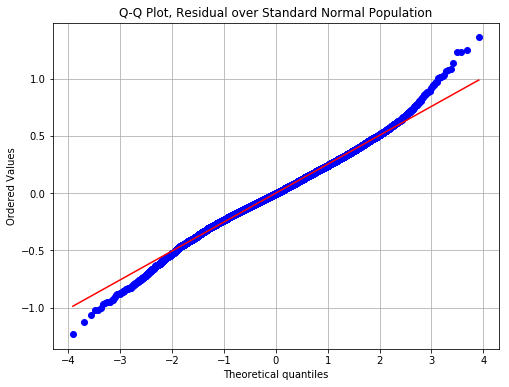

In [13]:
res = y_hat - y_train.values
fig = plt.figure(figsize=(8,6))
stats.probplot(res, dist="norm", plot=plt)
plt.title("Q-Q Plot, Residual over Standard Normal Population")
plt.grid(True)
plt.show()

In [14]:
df_A = df.sample(3000)
frames = []
valor = np.log(df.price)
for z in np.arange(int(np.min(valor)), int(np.max(valor))+1, 0.5):
    frames.append(df[(np.log(df.price) >= z) & (np.log(df.price) < z+0.5)].head(500))
df_B = pd.concat(frames).sample(3000)
X_A = df_A.iloc[:,1:].values
y_A = np.log(df_A.price)
X_B = df_B.iloc[:,1:].values
y_B = np.log(df_B.price)
Xtrain_A, Xval_A, ytrain_A, yval_A = train_test_split(X_A, y_A, test_size=0.3, random_state=42)
Xtrain_B, Xval_B, ytrain_B, yval_B = train_test_split(X_B, y_B, test_size=0.3, random_state=42)
print(Xtrain_A.shape, Xval_A.shape, ytrain_A.shape, yval_A.shape)
print(Xtrain_B.shape, Xval_B.shape, ytrain_B.shape, yval_B.shape)

(2100, 17) (900, 17) (2100,) (900,)
(2100, 17) (900, 17) (2100,) (900,)


In [15]:
scaler_A = StandardScaler().fit(Xtrain_A)
scaler_B = StandardScaler().fit(Xtrain_B)
scaled_train_A = np.column_stack((scaler_A.transform(Xtrain_A), np.ones(Xtrain_A.shape[0])))
scaled_train_B = np.column_stack((scaler_B.transform(Xtrain_B), np.ones(Xtrain_B.shape[0])))
linreg_A = lm.LinearRegression(fit_intercept=False)
linreg_A.fit(scaled_train_A, ytrain_A.values)
linreg_B = lm.LinearRegression(fit_intercept=False)
linreg_B.fit(scaled_train_B, ytrain_B.values)

y_hat_A = linreg_A.predict(scaled_train_A)
y_hat_B = linreg_B.predict(scaled_train_B)
res_A = y_hat_A - ytrain_A.values
res_B = y_hat_B - ytrain_B.values

In [16]:
stats.describe(ytrain_A)

DescribeResult(nobs=2100, minmax=(11.350406535472453, 15.770309654436833), mean=13.042872496290256, variance=0.27828174833114039, skewness=0.42395654123539833, kurtosis=1.0051898592129742)

In [17]:
stats.describe(ytrain_B)

DescribeResult(nobs=2100, minmax=(11.225243392518447, 15.744855690144892), mean=13.224222006644828, variance=0.7592898235025205, skewness=0.090427638496368, kurtosis=-0.8588720464236586)

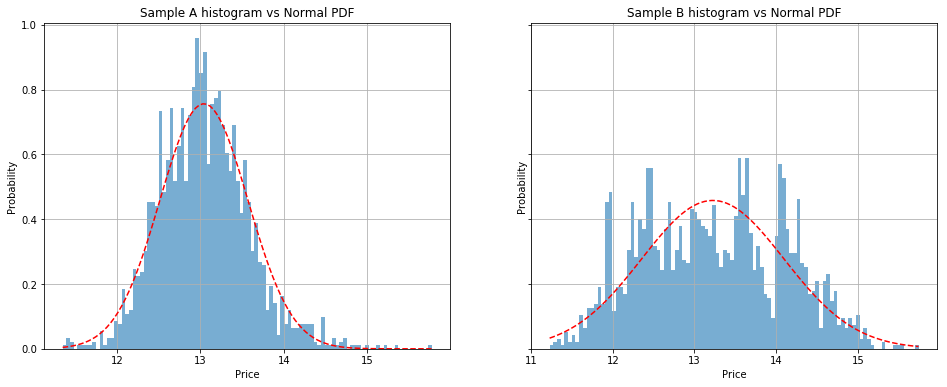

In [18]:
n_bins = 100

f, axarr = plt.subplots(1,2, sharey=True)
f.set_size_inches(16,6)

_, bins, _ = axarr[0].hist(ytrain_A.values, n_bins, normed=True, alpha=0.6)
pdf = mlab.normpdf(bins, ytrain_A.values.mean(), ytrain_A.values.std())
axarr[0].plot(bins, pdf, 'r--')
axarr[0].set_title("Sample A histogram vs Normal PDF")
axarr[0].set_xlabel("Price")
axarr[0].set_ylabel("Probability")
axarr[0].grid(True)

_, bins, _ = axarr[1].hist(ytrain_B.values, n_bins, normed=True, alpha=0.6)
pdf = mlab.normpdf(bins, ytrain_B.values.mean(), ytrain_B.values.std())
axarr[1].plot(bins, pdf, 'r--')
axarr[1].set_title("Sample B histogram vs Normal PDF")
axarr[1].set_xlabel("Price")
axarr[1].set_ylabel("Probability")
axarr[1].grid(True)

plt.show()

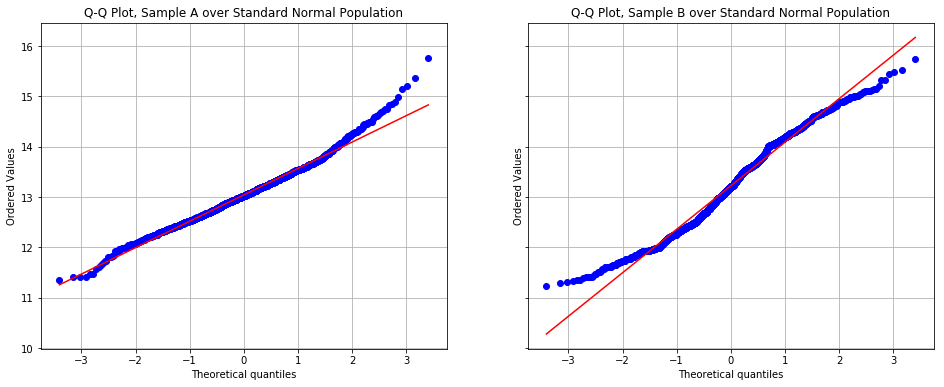

In [19]:
f, (ax1, ax2) = plt.subplots(1,2, sharey=True)
f.set_size_inches(16, 6)
stats.probplot(ytrain_A.values, dist="norm", plot=ax1)
stats.probplot(ytrain_B.values, dist="norm", plot=ax2)
ax1.set_title("Q-Q Plot, Sample A over Standard Normal Population")
ax2.set_title("Q-Q Plot, Sample B over Standard Normal Population")
ax1.grid(True)
ax2.grid(True)
plt.show()

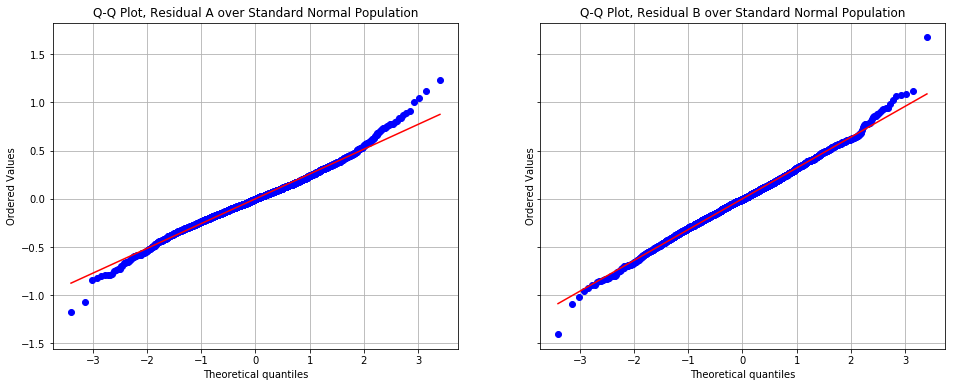

In [20]:
f, (ax1, ax2) = plt.subplots(1,2, sharey=True)
f.set_size_inches(16, 6)
stats.probplot(res_A, dist="norm", plot=ax1)
stats.probplot(res_B, dist="norm", plot=ax2)
ax1.set_title("Q-Q Plot, Residual A over Standard Normal Population")
ax2.set_title("Q-Q Plot, Residual B over Standard Normal Population")
ax1.grid(True)
ax2.grid(True)
plt.show()

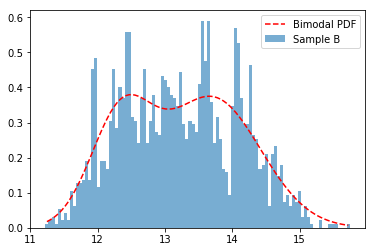

In [21]:
def gauss(x,mu,sigma,A):
    return A*np.exp(-(x-mu)**2/2/sigma**2)

def bimodal(x,mu1,sigma1,A1,mu2,sigma2,A2):
    return gauss(x,mu1,sigma1,A1)+gauss(x,mu2,sigma2,A2)

f, ax = plt.subplots()
y, x, _ = ax.hist(ytrain_B.values, 100, normed=True, alpha=0.6, label="Sample B")
x=(x[1:]+x[:-1])/2

from scipy.optimize import curve_fit
params, cov = curve_fit(bimodal, x, y, (12.5, 0.2,250, 14,0.2,125))
sigma = np.sqrt(np.diag(cov))
ax.plot(x, bimodal(x, *params), 'r--', label="Bimodal PDF")
ax.legend()
plt.show()

In [22]:
pparams = pd.DataFrame(data={'Params':params,'Covariance':sigma},index=bimodal.__code__.co_varnames[1:])
pparams

,Covariance,Params
mu1,0.109989,12.344241
sigma1,0.086039,0.453847
A1,0.066269,0.304072
mu2,0.159266,13.697143
sigma2,0.124506,0.719349
A2,0.026509,0.370809


In [23]:
def fss(x, y, names_x, k=10000):
    p = x.shape[1]-1
    k = min(p, k)
    remaining = list(range(0, p))
    selected = [p]
    current_score = 0.0
    best_new_score = 0.0
    while remaining and len(selected)<=k:
        score_candidates = []
        for candidate in remaining:
            model = lm.LinearRegression(fit_intercept=False)
            indexes = selected + [candidate]
            x_train = x[:,indexes]
            predictions_train = model.fit(x_train, y).predict(x_train)
            residuals_train = predictions_train - y
            mse_candidate = np.mean(np.power(residuals_train, 2))
            score_candidates.append((mse_candidate, candidate))
        score_candidates.sort()
        score_candidates[:] = score_candidates[::-1]
        best_new_score, best_candidate = score_candidates.pop()
        remaining.remove(best_candidate)
        selected.append(best_candidate)
        #print("selected = %s ..."%names_x[best_candidate])
        #print("totalvars=%d, mse = %f"%(len(indexes),best_new_score))
    selected.sort()
    return selected

In [77]:
def get_comb(indexes):
    if len(indexes) == 1:
        return tuple(zip(*[indexes + indexes]))
    combs = []
    for i in range(0, len(indexes)-1):
        for j in range(i+1, len(indexes)):
            combs.append([indexes[i],indexes[j]])
    return tuple(zip(*combs))
    
def fss_cfs(x, y, names_x, k=10000):
    p = x.shape[1]-1
    k = min(p, k)
    remaining = list(range(0, p))
    selected = [p]
    current_score = 0.0
    best_new_score = 0.0
    corr = np.corrcoef(np.column_stack((x[:,:-1], y)).T)
    while remaining and len(selected)<=k:
        score_candidates = []
        for candidate in remaining:
            indexes = selected[1:] + [candidate]
            merit = np.sum(corr[-1,indexes])/np.sqrt(k+2*np.sum(corr[get_comb(indexes)]))
            score_candidates.append((merit, candidate))
        score_candidates.sort()
        score_candidates[:] = score_candidates[::-1]
        best_new_score, best_candidate = score_candidates.pop()
        remaining.remove(best_candidate)
        selected.append(best_candidate)
        #print("selected = %s ..."%names_x[best_candidate])
        #print("totalvars=%d, merit = %f"%(len(indexes),best_new_score))
    selected.sort()
    return selected

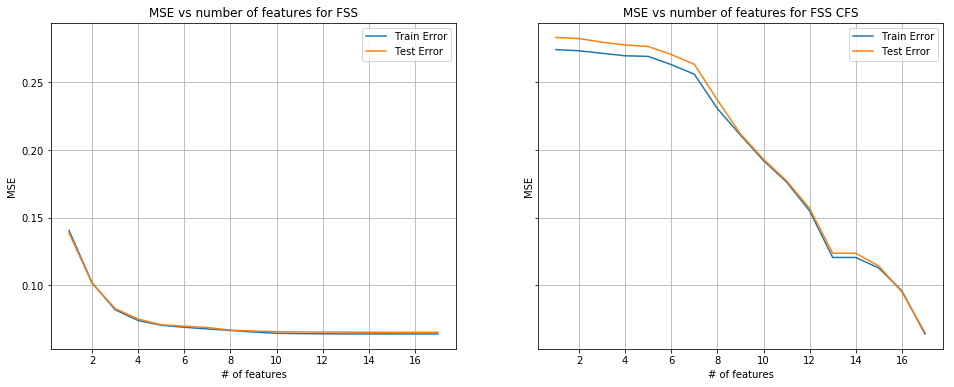

In [88]:
names_regressors = np.array(["bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront","view",
"condition","grade","sqft_above","sqft_basement","yr_built","yr_renovated","lat","long",
"sqft_living15","sqft_lot15","intercept"])

Xm_train = scaled_x_train.as_matrix()
ym_train = y_train.as_matrix()
Xm_test = scaled_x_test.as_matrix()
ym_test = y_test.as_matrix()

f, (ax1, ax2) = plt.subplots(1,2, sharey=True)
f.set_size_inches(16,6)
x = np.arange(1, len(names_regressors))
y = []

for i in x:
    features = fss(Xm_train, ym_train, names_regressors, k=i)
    linreg = lm.LinearRegression(fit_intercept=False)
    linreg.fit(Xm_train[:,features], ym_train)
    train_predict = linreg.predict(Xm_train[:,features])
    test_predict = linreg.predict(Xm_test[:,features])
    err_train = np.mean(np.power(train_predict - ym_train, 2))
    err_test = np.mean(np.power(test_predict - ym_test,2))
    y.append([err_train, err_test])
ax1.set_xlabel("# of features")
ax1.set_ylabel("MSE")
ax1.set_title("MSE vs number of features for FSS")
ax1.grid(True)
ax1.plot(x, np.array(y)[:,0], label="Train Error")
ax1.plot(x, np.array(y)[:,1], label="Test Error")
ax1.legend()

y = []
for i in x:
    features = fss_cfs(Xm_train, ym_train, names_regressors, k=i)
    linreg = lm.LinearRegression(fit_intercept=False)
    linreg.fit(Xm_train[:,features], ym_train)
    train_predict = linreg.predict(Xm_train[:,features])
    test_predict = linreg.predict(Xm_test[:,features])
    err_train = np.mean(np.power(train_predict - ym_train, 2))
    err_test = np.mean(np.power(test_predict - ym_test,2))
    y.append([err_train, err_test])
ax2.set_xlabel("# of features")
ax2.set_ylabel("MSE")
ax2.set_title("MSE vs number of features for FSS CFS")
ax2.grid(True)
ax2.plot(x, np.array(y)[:,0], label="Train Error")
ax2.plot(x, np.array(y)[:,1], label="Test Error")
ax2.legend()